# Now download accompanying complex data from the ADCP

In the previous notebook we saw how the turbidity increased suddenly at the end of the slack tide. These measurements were made at the seafloor, at a depth of 101 m. What was happening in the water column? We will look at the full water column in this notebook.

<img src="/ADCP Folder/ddl_deployment.jpg" width="" align="" />

Recall that the ADCP is an instrument attached to the DDL platform on seafloor at 101 m depth. The four red transducer heads on this instrument are sending acoustic pulses upward through the water column directly above this platform. What does it see over time, while looking up to the water surface?

We are going to use a pre-generated NetCDF file for the examples in this notebook. Using the Oceans 3.0 API, you could request this product, but to save time we have pre-generated it for you and added it to the files in the Deepnote ADCP folder. We are going to load that file into an Xarray in order to visualize it.

## Import the Xarray library

In [2]:
#import library to open the NetCDF (Network Common Data Form) file
import xarray as xr 

## Load the complex data into an Array

In [5]:
#Open the NetCDF file from the "ADCP Folder" directory.
ds = xr.open_dataset('ADCP Folder/RDIADCP300WH15551_20220612T000000Z_20220613T000000Z-Ensemble60s_binMapNearest.nc')
ds                    # Display the dataset 

<xarray.Dataset>
Dimensions:            (time: 1440, depth: 65, latitude: 1, longitude: 1)
Coordinates:
  * time               (time) datetime64[ns] 2022-06-12T00:00:29.999998208 .....
  * depth              (depth) float64 107.8 105.8 103.8 ... -18.16 -20.16
  * latitude           (latitude) float64 49.08
  * longitude          (longitude) float64 -123.3
Data variables: (12/27)
    binmap_depth       (depth) float64 ...
    range              (depth) float64 ...
    u                  (depth, time) float64 ...
    v                  (depth, time) float64 ...
    w                  (depth, time) float64 ...
    velocityError      (depth, time) float64 ...
    ...                 ...
    velocity_beam3     (depth, time) float64 ...
    velocity_beam4     (depth, time) float64 ...
    temperature        (time) float64 ...
    compassHeading     (time) float64 ...
    pitch              (time) float64 ...
    roll               (time) float64 ...
Attributes: (12/38)
    Conventions:                             CF-1.7
    title:                                   Ocean Networks Canada Teledyne-R...
    institution:                             Ocean Networks Canada
    source:                                  Fixed-position Teledyne-RDI ADCP...
    references:                              https://www.oceannetworks.ca/
    comment:                                 Detailed documentation: https://...
    ...                                      ...
    adcp_setup_WE_blanking_distance_meters:  1.76
    adcp_setup_WG_percent_good_minimum:      0.0
    adcp_setup_WN_number_bins:               65.0
    adcp_setup_WP_number_pings:              1.0
    adcp_setup_WS_cell_size_meters:          2.0
    adcp_setup_WT_transmit_length:           2.37

In [7]:
# Import additional libraries
import numpy as np                #for mathematical operations
from matplotlib import cm, ticker #cm provides a collection of colormaps while ticker provides tick locators
import matplotlib.pyplot as plt   #module provides a convenient interface for creating various types of plots and charts with minimal coding
import cmocean                    #used for colormaps specifically designed for oceanographic and climate-related visualizations
import matplotlib.dates as mdates #provides functionality to formatting and manipulating dates and times for plotting

## Visualize upward movement

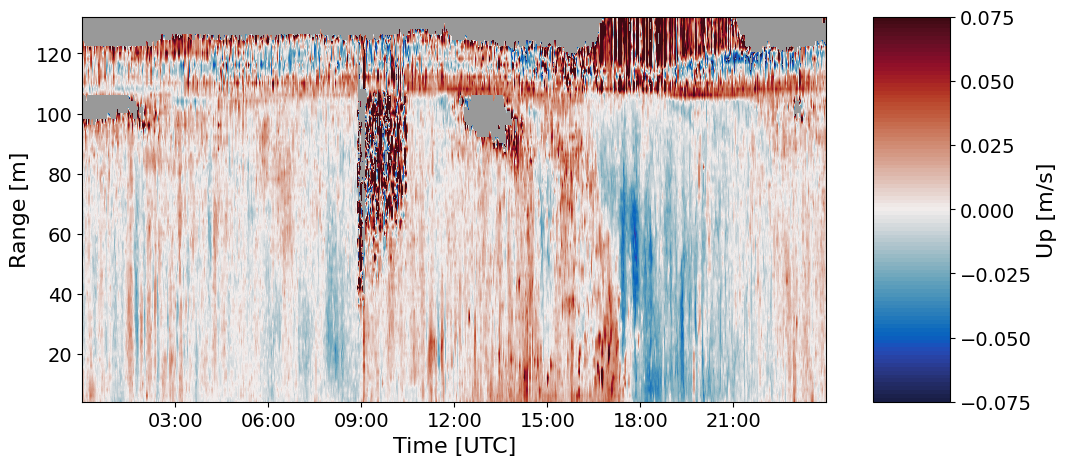

In [9]:
# Set up the plot
plt.figure(figsize=(12, 5))
V_up = ds.w.values
minV, maxV = -0.075, 0.075
N = np.linspace(minV, maxV, 100, endpoint=True)
cs = plt.contourf(ds.time.values, ds.range.values, V_up, N, cmap=cmocean.cm.balance, vmin=minV, vmax=maxV)

# Add colorbar
step = 0.025
cb = plt.colorbar(cs, ticks=np.arange(minV, maxV + step, step), aspect=5)
cb.set_label(label='Up [m/s]', size=16)
cb.ax.tick_params(labelsize=14)

# Set styling
plt.gca().set_facecolor((0.6, 0.6, 0.6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xlabel('Time [UTC]', fontsize=16)
plt.ylabel('Range [m]', fontsize=16)
plt.tick_params(axis='both', labelsize=14)

# Save the plot
plt.savefig(f'ADCP_{ds.time_coverage_start}_{ds.time_coverage_end}_Velocities.png', dpi=300)

The above plot shows the water column from the seafloor up to the surface at about 110 m. The plot shows vertical velocities over time. Red shades indicate upward velocities and blue shades indicate downward velocities. We can see that there was a strong shift from upward movements to downward movements at around 17 UTC. The downward movement starts near the surface, then extends to the seafloor by 18 UTC. 

## Visualize the backscatter for each beam

Next, let's look at backscatter or beam intensity. The ADCP has 4 acoustic beams looking upward through the water column. Let's look at all four of them.

Text(0.5, 1.0, 'Strait of Georgia Delta Node - ADCP Beam Intensity (RSSI) \n20220612T000030Z to 20220612T235930Z')

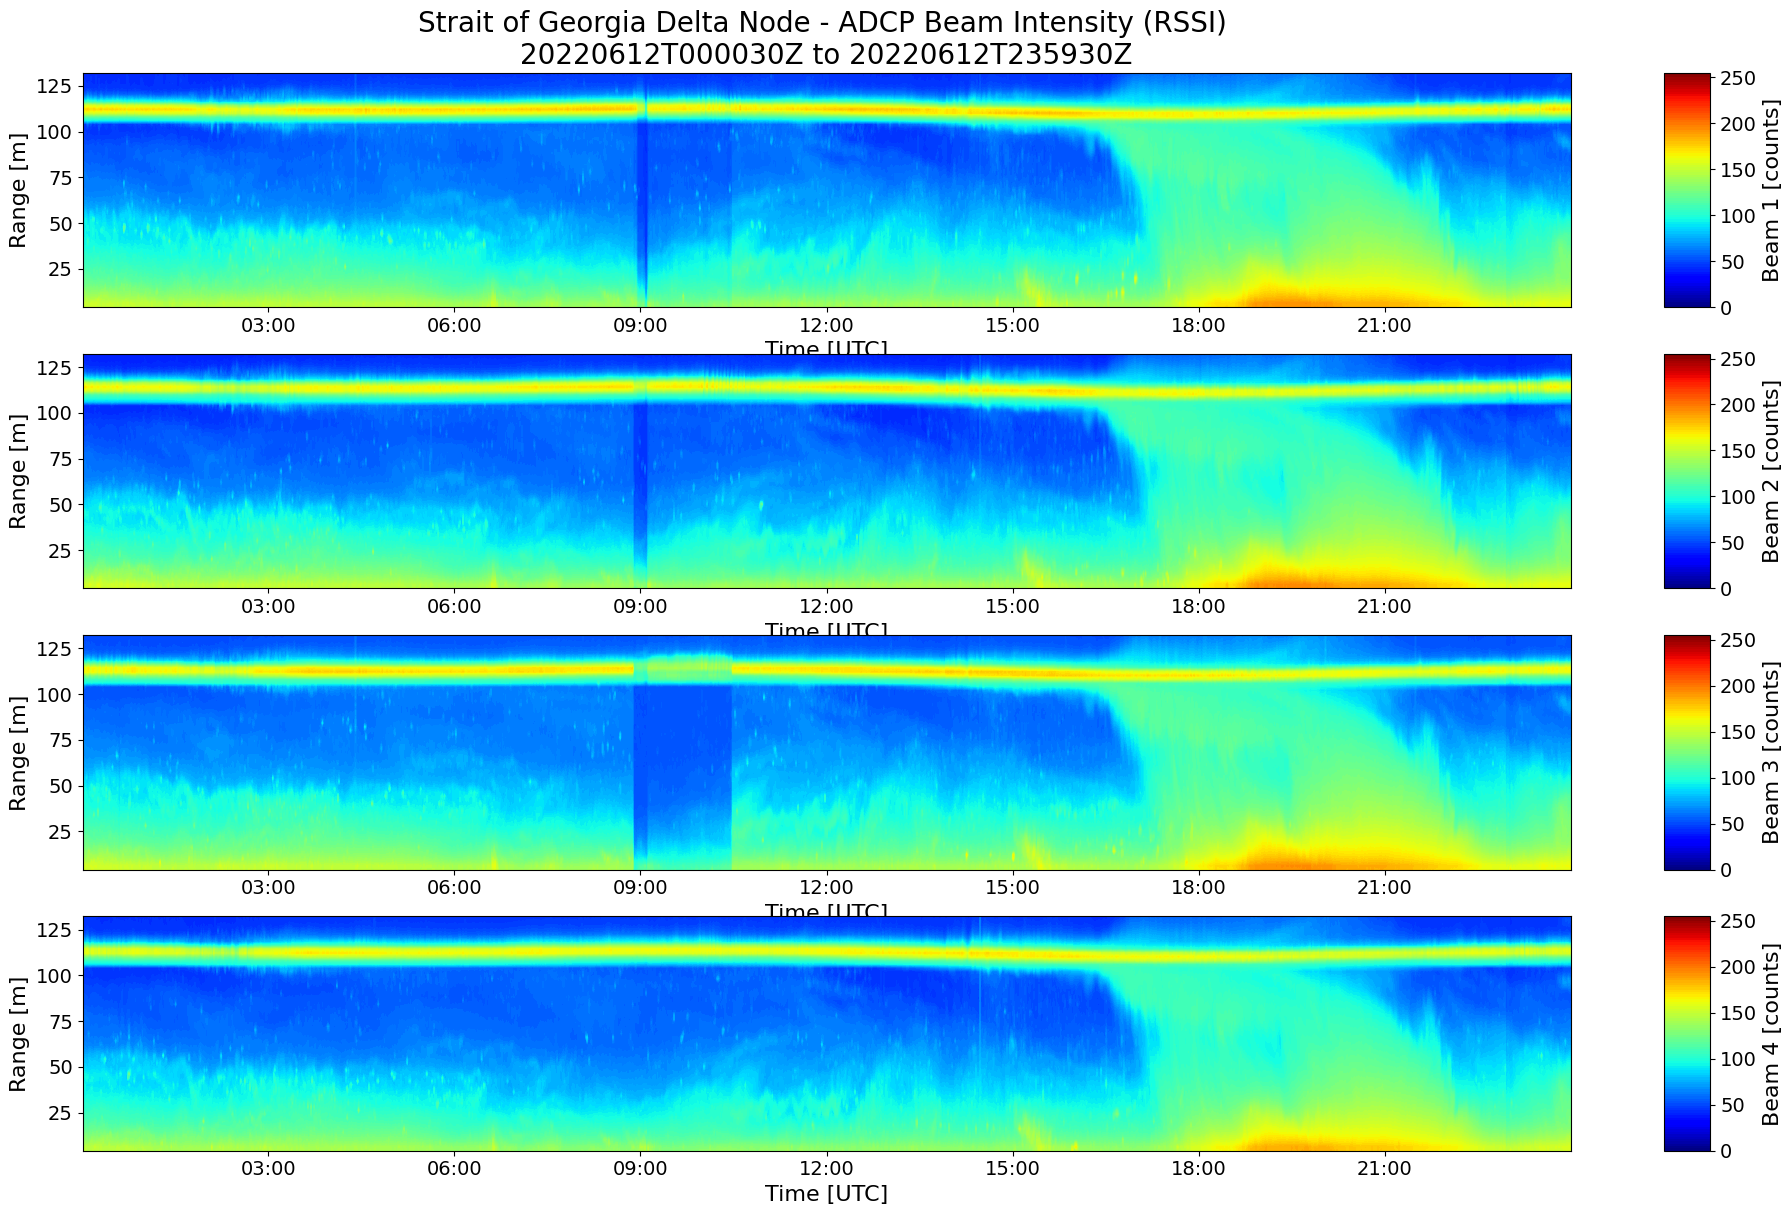

In [12]:
# Create a figure and four subplots arranged in a column
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, ncols=1, sharex=False, figsize=(24, 14))

# Define beam indices for iteration
beam_indices = [1, 2, 3, 4]

# Iterate over beam indices and corresponding subplots
for beam_index, ax in zip(beam_indices, [ax0, ax1, ax2, ax3]):
    # Extract intensity data for the current beam
    ii = ds[f'intens_beam{beam_index}'].values
    
    # Set minimum and maximum values for contour levels
    minV, maxV = 0, 255
    
    # Generate contour levels
    N = np.linspace(minV, maxV, 100, endpoint=True)
    
    # Create a filled contour plot
    cs = ax.contourf(ds.time.values, ds.range.values, ii, N, cmap='jet', vmin=minV, vmax=maxV)
    
    # Set colorbar settings
    step = 50
    cb = fig.colorbar(cs, ticks=np.arange(minV, maxV + step, step), aspect=5)
    cb.set_label(label=f'Beam {beam_index} [counts]', size=16)
    cb.ax.tick_params(labelsize=14)
    
    # Set subplot background color
    ax.set_facecolor((0.6, 0.6, 0.6))
    
    # Format x-axis labels as hours and minutes
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
    
    # Set labels for the x and y axes
    ax.set_xlabel('Time [UTC]', fontsize=16)
    ax.set_ylabel('Range [m]', fontsize=16)
    
    # Adjust font size of axis labels
    ax.tick_params(axis='both', labelsize=14)

# Set title for the entire plot
ax0.set_title(str(ds.location_name) + ' - ADCP Beam Intensity (RSSI) \n' + str(ds.time_coverage_start) + ' to ' + str(ds.time_coverage_end),
              fontsize=20)


## Generate an average backscatter plot

Now, let's average all 4 beams to create a composite view of the event.

Text(0.5, 1.0, 'Strait of Georgia Delta Node - ADCP Average Beam Intensity \n20220612T000030Z to 20220612T235930Z')

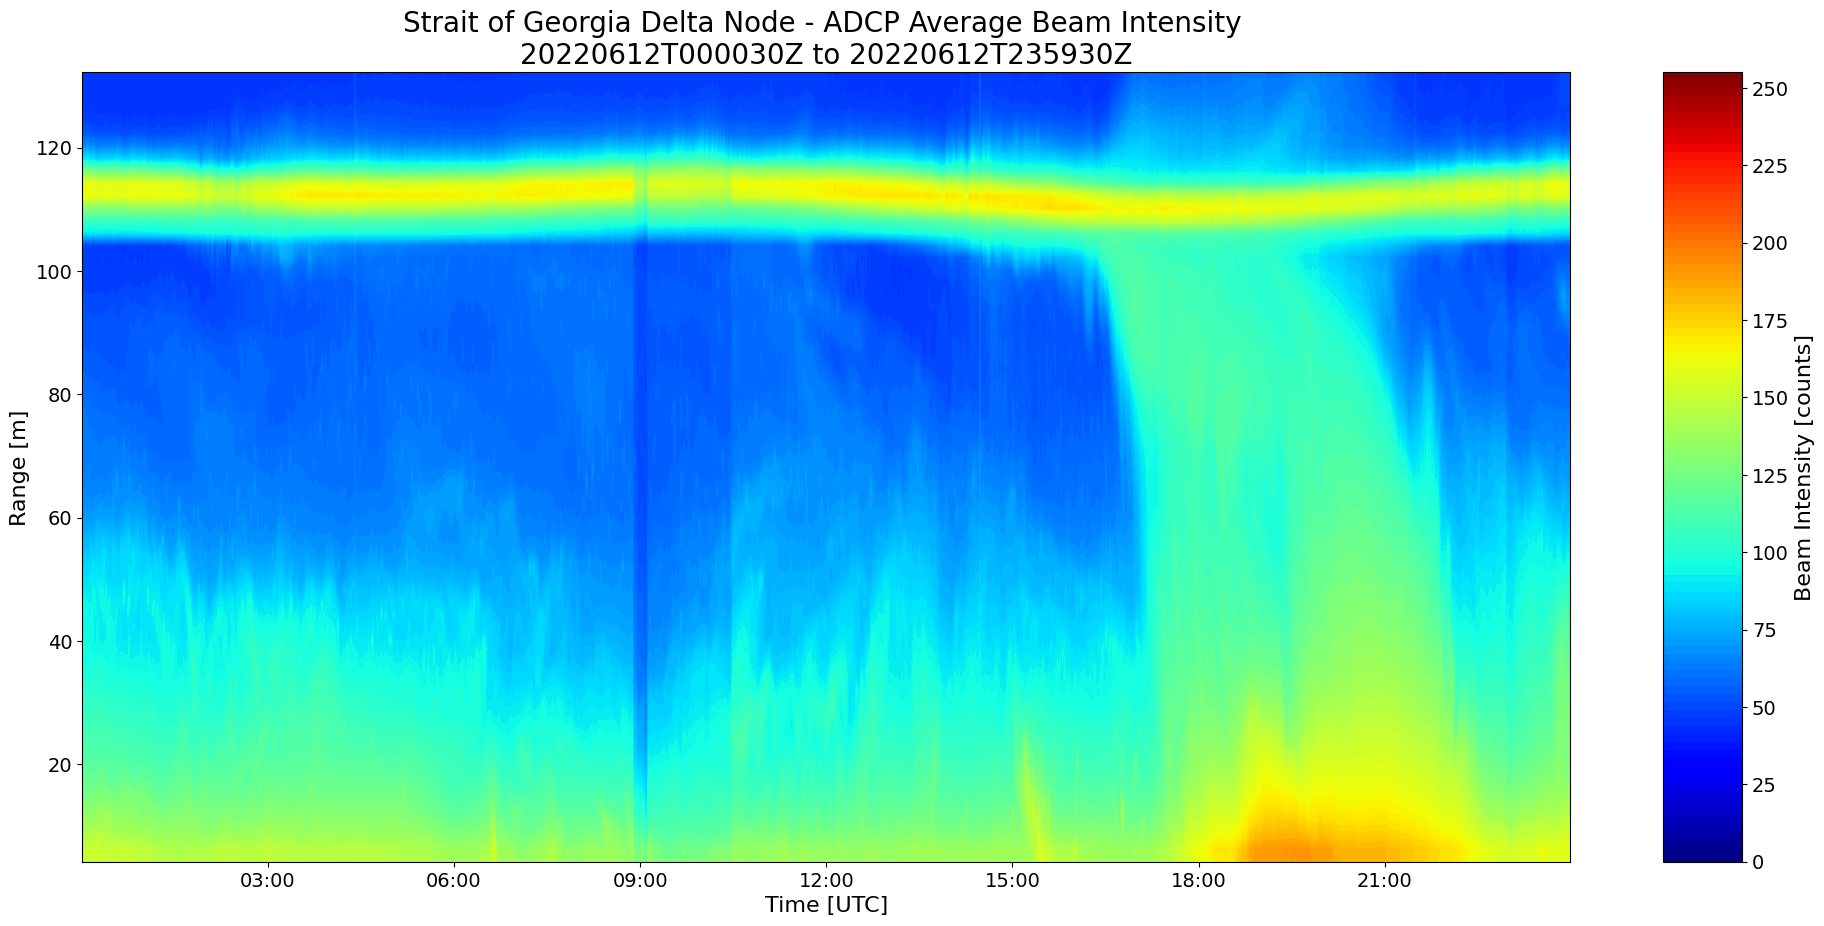

In [11]:
# Extract intensity values for each beam
i1, i2, i3, i4 = ds.intens_beam1.values, ds.intens_beam2.values, ds.intens_beam3.values, ds.intens_beam4.values

# Calculate the average intensity across all beams
I = (i1 + i2 + i3 + i4) / 4

# Set up the plot
fig, ax = plt.subplots(figsize=(24, 10.25))

# Set contour plot range
minV, maxV = 0, 255

# Generate contour levels
N = np.linspace(minV, maxV, 100, endpoint=True)

# Create a filled contour plot
cs = ax.contourf(ds.time.values, ds.range.values, I, N, cmap='jet', vmin=minV, vmax=maxV)

# Set up colorbar
step = 25
cb = fig.colorbar(cs, ticks=np.arange(minV, maxV + step, step), aspect=10)
cb.set_label(label='Beam Intensity [counts]', size=16)
cb.ax.tick_params(labelsize=14)

# Set styling
ax.set_facecolor((0.6, 0.6, 0.6))
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel('Time [UTC]', fontsize=16)
ax.set_ylabel('Range [m]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.tick_params(axis='both', labelsize=14)

# Set title for the plot
plt.title(str(ds.location_name) + ' - ADCP Average Beam Intensity \n' + str(ds.time_coverage_start) + ' to ' + str(ds.time_coverage_end),
          fontsize=20)



In the above plot you can see the full water column from the seafloor to the sea surface indicated by the bright horizontal yellow line. Time is marked along the x axis. The water depth here is about 110 m. There are some returns from above the yellow line, but these are reflections of the sound energy from the water surface, not actual returns. Here you can see very clearly the cascade of green (medium intensity) shades from the surface to the seafloor, starting at about 17 UTC. Near the seafloor backscatter values are even stronger, in yellow and orange shades, indicating more suspended sediment. 

# What's happening here?

During May-July the Fraser River, fed by snow melt runoff from the mountains, is strong and carries a lot of sediment. When the river meets the ocean there is a Saltwater Wedge interaction between tides and river flow that can be seen quite some distance up the river. During a flood tide the Strait of Georgia sea water pushes into the Fraser River, stopping or even reversing the flow. Then when the tide then turns to ebb, the flow from the Fraser River is released into the Strait of Georgia. As it surges seaward, it rains sediment (and fresher water) over the delta, including the location of the Delta Dynamics Lab. This is seen most clearly in the ADCP backscatter. It is also seen on the earlier vertical velocity plot as a upwards current.